In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
train = pd.read_csv("C:/Users/10645556/Documents/experiments/train.csv")

In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 164.,  387.,  137.,   25.,    1.]),
 array([  0,  20,  40,  60,  80, 100]),
 <a list of 5 Patch objects>)

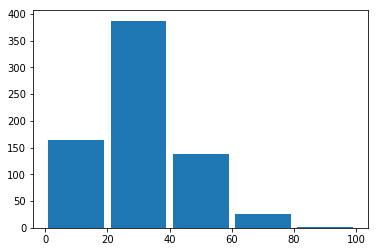

In [21]:
plt.hist(train['Age'] , bins = [0,20,40,60,80,100] , range=[0,100] , rwidth = 0.9)

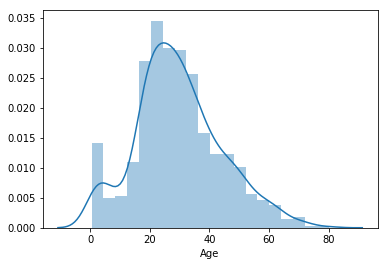

In [38]:
sns.distplot(train[train.Age.notnull()]['Age'])

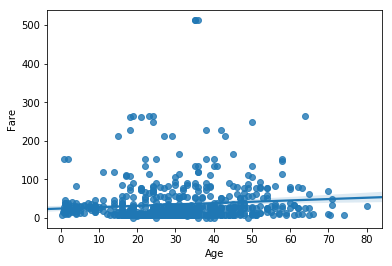

In [39]:
sns.regplot(x=train[train.Age.notnull()]['Age'] , y=train[train.Age.notnull()]['Fare'])

In [61]:
train["Age"].fillna(train["Age"].mean() , inplace = True)

In [62]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
train.select_dtypes(exclude = [object]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [65]:
regressor = RandomForestRegressor(n_estimators = 100 , oob_score = True , random_state = 42)


In [99]:
X = train.loc[:,['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train.loc[:,["Survived"]]

In [67]:
regressor.fit(X , y)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [101]:
y_oob= regressor.oob_prediction_

In [102]:
y_oob

array([ 0.17555556,  1.        ,  0.44186047,  1.        ,  0.        ,
        0.09977827,  0.20588235,  0.52941176,  0.63888889,  1.        ,
        0.55555556,  0.41176471,  0.2655914 ,  0.025     ,  0.74193548,
        0.90625   ,  0.2       ,  0.02380952,  0.93478261,  0.90909091,
        0.05714286,  0.05128205,  0.71794872,  0.43478261,  0.27777778,
        0.02564103,  0.        ,  0.2       ,  0.9375    ,  0.        ,
        0.26315789,  0.89473684,  0.88043837,  0.5       ,  0.15384615,
        0.425     ,  0.        ,  0.        ,  0.13157895,  0.36170213,
        0.15      ,  0.86666667,  0.07043651,  0.65625   ,  0.63636364,
        0.        ,  0.02941176,  0.8469619 ,  0.51162791,  0.29032258,
        0.025     ,  0.66666667,  1.        ,  1.        ,  0.21212121,
        0.2       ,  0.92307692,  0.52462406,  0.96969697,  0.        ,
        0.52380952,  1.        ,  0.23076923,  0.21428571,  0.11904762,
        0.625     ,  1.        ,  0.4047619 ,  0.48387097,  0.20

In [69]:
roc_auc_score(y , y_oob)

0.73995515503999831

In [70]:
train.select_dtypes(include = [object]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Berriman, Mr. William John",male,347082,B96 B98,S
freq,1,577,7,4,644


In [71]:
train["Embarked"].fillna(value=train["Embarked"].mode()[0] , inplace=True)

In [72]:
train.select_dtypes(include = [object]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Berriman, Mr. William John",male,347082,B96 B98,S
freq,1,577,7,4,646


In [73]:
train.Cabin.fillna('N' , inplace = True)

In [74]:
for i in range(0,891):
    train.Cabin[i] = train.Cabin[i][0]

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
train1 = pd.get_dummies(train , columns=['Cabin' , 'Sex' , 'Embarked'])

In [76]:
train1

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_A,...,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,...,0,0,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,...,0,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,...,0,0,0,1,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,...,0,0,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,...,0,0,0,1,0,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,0,...,0,0,0,1,0,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0,...,1,0,0,0,0,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,0,...,0,0,0,1,0,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,...,0,0,0,1,0,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,0,...,0,0,0,1,0,1,0,1,0,0


In [77]:
train1.select_dtypes(exclude = [object]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_N', 'Cabin_T', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [78]:
train1.drop(['PassengerId', 'Survived' , 'Name' , 'Ticket'] , axis = 1)

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,0,0,0,0,0,0,1,0,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,0,0,0,1,0,0,0,0,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,0,0,0,0,0,0,1,0,0,1,0,0,1
8,3,27.000000,0,2,11.1333,0,0,0,0,0,0,0,1,0,1,0,0,0,1
9,2,14.000000,1,0,30.0708,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [79]:
X_full = train1.drop(['PassengerId', 'Survived' , 'Name' , 'Ticket'] , axis = 1)

In [80]:
X_full.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin_A         uint8
Cabin_B         uint8
Cabin_C         uint8
Cabin_D         uint8
Cabin_E         uint8
Cabin_F         uint8
Cabin_G         uint8
Cabin_N         uint8
Cabin_T         uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [81]:
regressor.fit(X_full , y)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [82]:
regressor.oob_score_

0.40980516850514703

In [83]:
y_oom = regressor.oob_prediction_

In [84]:
roc_auc_score(y , y_oom)

0.86498045356256448

In [90]:
y = train.loc[:,["Survived"]]

In [110]:
arr = [100 , 200 , 300 , 400 , 500]

for i in arr:
    reg = RandomForestRegressor(n_estimators = i , oob_score = True , random_state = 42)
    reg.fit(X_full , y.values.ravel())
    y_oob = reg.oob_prediction_
    print("Accuracy with n_estimator = " , i , "is" , roc_auc_score(y , y_oob))
    

Accuracy with n_estimator =  100 is 0.864980453563
Accuracy with n_estimator =  200 is 0.862860703672
Accuracy with n_estimator =  300 is 0.862224246104
Accuracy with n_estimator =  400 is 0.864194867862
Accuracy with n_estimator =  500 is 0.863401293154
